In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
#open file with cold vs hot scores (temp codes 0 vs 1)
path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks'
coldhot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_01_alphapoint875.pkl')
coldrt = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_02_alphapoint875.pkl')
rthot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_21_alphapoint875.pkl')

dataset2_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_23_alphapoint875.pkl')
dataset3_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_01_alphapoint875.pkl')
dataset4_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_02_alphapoint875.pkl')
dataset5_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_03_alphapoint875.pkl')
dataset6_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_12_alphapoint875.pkl')
dataset7_scores = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_13_alphapoint875.pkl')

In [44]:
len(dataset2_scores)

529

In [5]:
dataset1_scores = np.sort(coldhot[:,1])[::-1][:int(0.2*len(coldhot[:,1]))]
dataset2_scores = np.sort(dataset2_scores[:,1])[::-1][:int(0.2*len(dataset2_scores[:,1]))]
dataset3_scores = np.sort(dataset3_scores[:,1])[::-1][:int(0.2*len(dataset3_scores[:,1]))]
dataset4_scores = np.sort(dataset4_scores[:,1])[::-1][:int(0.2*len(dataset4_scores[:,1]))]
dataset5_scores = np.sort(dataset5_scores[:,1])[::-1][:int(0.2*len(dataset5_scores[:,1]))]
dataset6_scores = np.sort(dataset6_scores[:,1])[::-1][:int(0.2*len(dataset6_scores[:,1]))]
dataset7_scores = np.sort(dataset7_scores[:,1])[::-1][:int(0.2*len(dataset7_scores[:,1]))]
dataset8_scores = np.sort(coldrt[:,1])[::-1][:int(0.2*len(coldrt[:,1]))]
dataset9_scores = np.sort(rthot[:,1])[::-1][:int(0.2*len(rthot[:,1]))]


In [6]:
means_list = [np.mean(dataset1_scores),np.mean(dataset2_scores),np.mean(dataset3_scores),np.mean(dataset4_scores),np.mean(dataset5_scores),np.mean(dataset6_scores),np.mean(dataset7_scores),np.mean(dataset8_scores),np.mean(dataset9_scores)]
dataset_list = [(dataset8_scores),(dataset1_scores),(dataset9_scores),(dataset2_scores),(dataset3_scores),(dataset4_scores),(dataset5_scores),(dataset6_scores),(dataset7_scores)]

In [7]:
combined_temps = np.column_stack(((dataset1_scores),(dataset8_scores),(dataset9_scores)))
taste_data = np.column_stack(((dataset2_scores),(dataset3_scores),(dataset4_scores),(dataset5_scores),(dataset6_scores),(dataset7_scores)))

In [8]:
combined_temps

array([[1.        , 0.85      , 1.        ],
       [1.        , 0.85      , 0.98888889],
       [1.        , 0.83030303, 0.95      ],
       [0.98888889, 0.82222222, 0.94      ],
       [0.96666667, 0.78888889, 0.93939394],
       [0.94444444, 0.77777778, 0.91111111],
       [0.93888889, 0.76969697, 0.875     ],
       [0.93333333, 0.76666667, 0.86666667],
       [0.92222222, 0.75      , 0.84444444],
       [0.92222222, 0.74666667, 0.83333333],
       [0.91666667, 0.73888889, 0.82777778],
       [0.91111111, 0.73333333, 0.82222222],
       [0.91111111, 0.73333333, 0.82222222],
       [0.90555556, 0.73333333, 0.82222222],
       [0.9       , 0.73333333, 0.81666667],
       [0.89444444, 0.73333333, 0.81666667],
       [0.88888889, 0.72777778, 0.80555556],
       [0.88666667, 0.72777778, 0.80555556],
       [0.88333333, 0.72380952, 0.80555556],
       [0.87222222, 0.72380952, 0.8       ],
       [0.86666667, 0.71111111, 0.8       ],
       [0.86666667, 0.70833333, 0.8       ],
       [0.

In [9]:
#np.savetxt('fig7_tempdat.csv', combined_temps, delimiter=',', fmt='%f')
#np.savetxt('fig7_tastedat.csv', taste_data, delimiter=',', fmt='%f')

In [10]:
dataset_list[8].shape

(105,)

In [11]:
#do 2sided ttest for all means compared to dataset 1 
    # (the mean of the underlying distribution of the sample (a, first param) 
    # is different than the given population mean (popmean, second param.))

from scipy import stats    
    
for i in range(1,len(means_list)):
    print(stats.ttest_ind(dataset_list[0],dataset_list[i], equal_var=False))

TtestResult(statistic=-13.038230941399927, pvalue=1.2162750188771912e-26, df=153.74368976927727)
TtestResult(statistic=-7.069803176225331, pvalue=5.095310909062533e-11, df=153.75568782435198)
TtestResult(statistic=0.20419836573081587, pvalue=0.8384299722163392, df=179.38442152420467)
TtestResult(statistic=-3.382978107178784, pvalue=0.0008910886318112997, df=169.02460311596124)
TtestResult(statistic=-3.362915288050883, pvalue=0.0009542814083033447, df=168.7852686231211)
TtestResult(statistic=1.677408066389853, pvalue=0.0951158872616714, df=188.9782359485276)
TtestResult(statistic=-1.8275496080250937, pvalue=0.06926344636714815, df=181.0434019755087)
TtestResult(statistic=-1.2727054884611357, pvalue=0.2047583671765783, df=180.6226777525341)


From the documentation:
- 'The statistic is calculated as (np.mean(a) - popmean)/se, where se is the standard error. Therefore, the statistic will be positive when the sample mean is greater than the population mean and negative when the sample mean is less than the population mean.'
    - this means that, as we see in the figure below, every one of the other datasets (2-9) has a lower mean than the first dataset.
- we are comparing against a significance value of like,, 0.00625 or something similar. so all of these are much lower than this, showing that we can accept the 2-sided t ttest assumption

### anova test 


In [12]:
from scipy.stats import f_oneway

#temperature ANOVA one way
f_oneway(dataset1_scores, dataset8_scores, dataset9_scores)

F_onewayResult(statistic=76.8767625357906, pvalue=7.456419787021952e-27)

In [13]:
#tastants ANOVA one way
f_oneway(dataset2_scores, dataset3_scores, dataset4_scores, dataset5_scores, dataset6_scores, dataset7_scores)

F_onewayResult(statistic=6.284780173392609, pvalue=1.0582430389217715e-05)

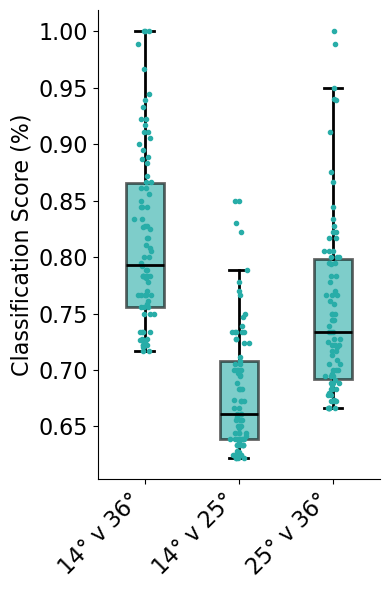

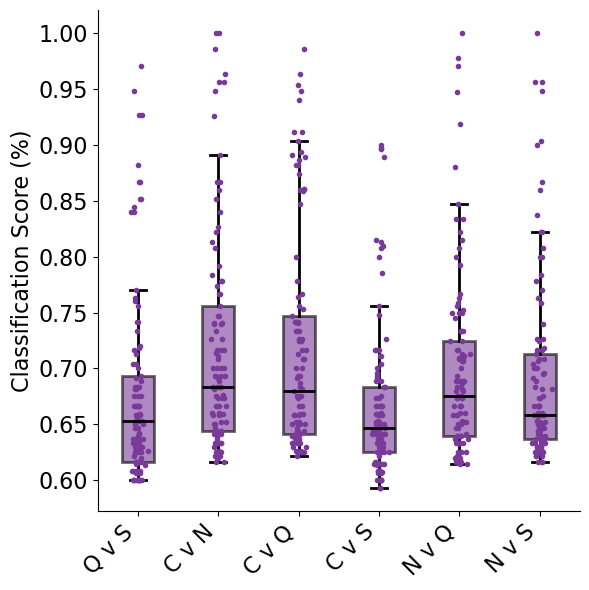

In [39]:
# First panel with rotated x-axis labels
fig1, ax1 = plt.subplots(figsize=(4, 6))  # Adjusted width for the first panel

# Suppressing the open circles for the outliers (fliers) by setting `marker=None`
boxplot1 = ax1.boxplot([dataset1_scores, dataset8_scores, dataset9_scores], 
                       patch_artist=True, showmeans=False, widths=0.4,
                       flierprops=dict(marker=None))  # Suppress fliers

ax1.set_xticks([1, 2, 3])  # Set explicit x-axis ticks
ax1.set_xticklabels([r'$14\degree$ v $36\degree$', r'$14\degree$ v $25\degree$', r'$25\degree$ v $36\degree$'], fontsize=16, rotation=45, ha='right')  # Rotate labels
ax1.set_ylabel('Classification Score (%)', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)

# Customizing box colors with opacity for the first panel
colors1 = ['#28ada8', '#28ada8', '#28ada8']
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)  # Set opacity for the box face color

# Adjusting the line thickness for the boxplot
for element in ['boxes', 'whiskers', 'caps']:
    plt.setp(boxplot1[element], linewidth=2.0)  # Adjust the thickness (2.0 is an example, can be increased or decreased)

# Setting the median line to black and making it thicker
plt.setp(boxplot1['medians'], color='black', linewidth=2.0)

# Adding gridlines to the first panel
#ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding individual data points as jittered points
for i, scores in enumerate([dataset1_scores, dataset8_scores, dataset9_scores]):
    x = np.random.normal(i + 1, 0.04, size=len(scores))  # Adjusted x positions
    ax1.plot(x, scores, '.', color='#28ada8', alpha=1.0)

# Removing the right and top spines for the first panel
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('panel1.svg', format='svg')
plt.show()

# Second panel with rotated x-axis labels
fig2, ax2 = plt.subplots(figsize=(6, 6))

# Suppressing the open circles for the outliers (fliers) by setting `marker=None`
boxplot2 = ax2.boxplot([dataset2_scores, dataset3_scores, dataset4_scores, dataset5_scores, dataset6_scores, dataset7_scores], 
                       patch_artist=True, showmeans=False, widths=0.4,
                       flierprops=dict(marker=None))  # Suppress fliers

ax2.set_xticks([1, 2, 3, 4, 5, 6])  # Set explicit x-axis ticks
ax2.set_xticklabels(['Q v S', 'C v N', 'C v Q', 'C v S', 'N v Q', 'N v S'], fontsize=16, rotation=45, ha='right')  # Rotate labels
ax2.set_ylabel('Classification Score (%)', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

# Customizing box colors with opacity for the second panel
colors2 = ['#7a3a9a', '#7a3a9a', '#7a3a9a', '#7a3a9a', '#7a3a9a', '#7a3a9a']
for patch, color in zip(boxplot2['boxes'], colors2):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)  # Set opacity for the box face color

# Adjusting the line thickness for the boxplot
for element in ['boxes', 'whiskers', 'caps']:
    plt.setp(boxplot2[element], linewidth=2.0)  # Adjust the thickness (2.0 is an example, can be increased or decreased)

# Setting the median line to black and making it thicker
plt.setp(boxplot2['medians'], color='black', linewidth=2.0)

# Adding gridlines to the second panel
#ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding individual data points as jittered points
for i, scores in enumerate([dataset2_scores, dataset3_scores, dataset4_scores, dataset5_scores, dataset6_scores, dataset7_scores]):
    x = np.random.normal(i +1, 0.04, size=len(scores))  # Adjusted x positions
    ax2.plot(x, scores, '.', color='#7a3a9a', alpha=1.0)

# Removing the right and top spines for the second panel
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('panel2.svg', format='svg')
plt.show()


In [40]:
len(dataset2_scores)

105